C:\Users\augus\AppData\Local\Temp\ipykernel_5312\132106813.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=48, freq='M')


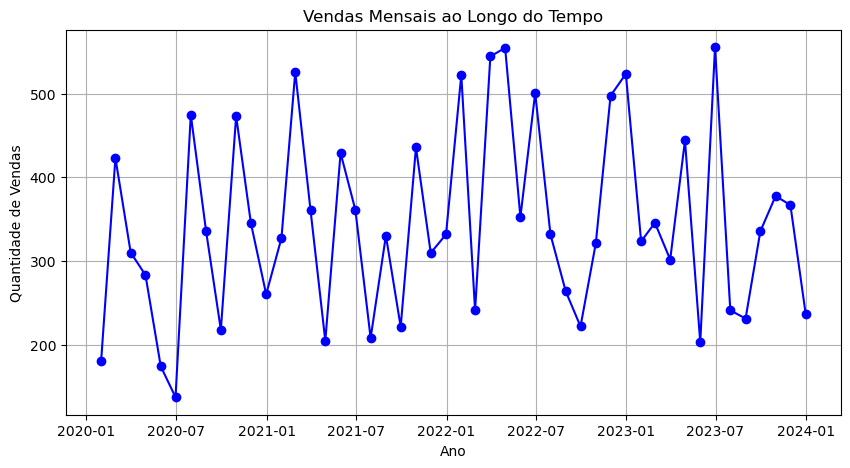

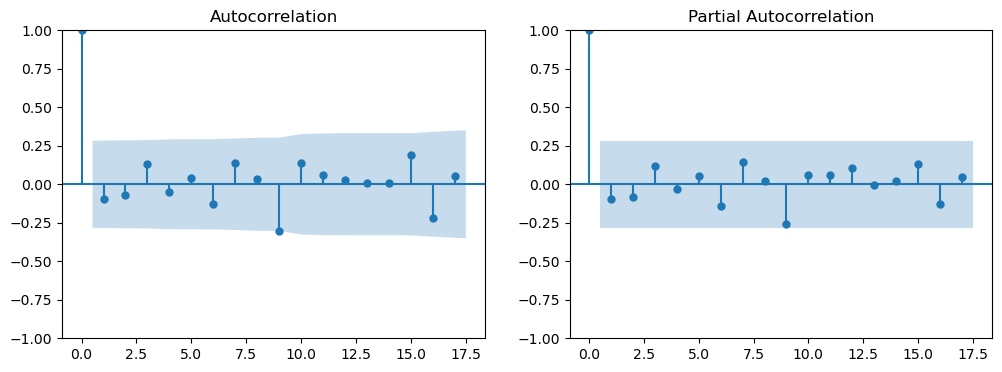

c:\Users\augus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\augus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
c:\Users\augus\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
C:\Users\augus\AppData\Local\Temp\ipykernel_5312\132106813.py:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label="Previsão", linestyle='dashed', color='r')


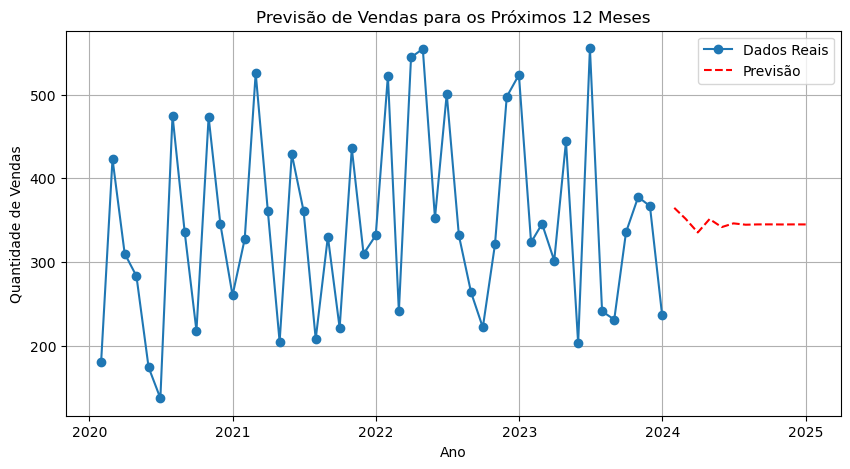

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Criando uma base de dados fictícia (exemplo: vendas mensais)
dates = pd.date_range(start='2020-01-01', periods=48, freq='ME')
vendas = np.random.randint(100, 500, size=48) + np.linspace(0, 100, 48)  # Tendência crescente

df = pd.DataFrame({'Data': dates, 'Vendas': vendas})
df.set_index('Data', inplace=True)

# 2. Visualizando a série temporal
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Vendas'], marker='o', linestyle='-', color='b')
plt.title("Vendas Mensais ao Longo do Tempo")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Vendas")
plt.grid()
plt.show()

# 3. Analisando autocorrelação
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(df['Vendas'], ax=axes[0])
plot_pacf(df['Vendas'], ax=axes[1])
plt.show()

# 4. Criando o modelo ARIMA (AutoRegressive Integrated Moving Average)
modelo = ARIMA(df['Vendas'], order=(2,1,2))  # Parâmetros ajustáveis
modelo_treinado = modelo.fit()

# 5. Previsão para os próximos 12 meses
forecast = modelo_treinado.forecast(steps=12)

# 6. Visualizando previsão
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Vendas'], label="Dados Reais", marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label="Previsão", linestyle='dashed', color='r')
plt.title("Previsão de Vendas para os Próximos 12 Meses")
plt.xlabel("Ano")
plt.ylabel("Quantidade de Vendas")
plt.legend()
plt.grid()
plt.show()

# 7. Salvando a base de dados fictícia
df.to_csv("series_temporais_vendas.csv", index=True)
